<h1>Bias-Variance Dilemma</h1>

<p>In machine learning models, it is always encountered to have a model that performs what we call "overfitting" and "underfitting". These ideas are related to the concept of bias and variance. </p>
<p>Simple, a model with "few" parameters than it apparently needs to, it tends to have <b>high bias and low variance</b>, and if a model has more parameters than it needs to, it tends to have <b>low bias and high variance</b>.High bias means that the model is just too simple for the data. High variance means the model is way too complex, and therefore it is not learning a general rule we meant to train, but it is even learning the noises or other types of fluctuations of the data.</p>

<h2>The idea that we must choose either of these, is called the bias-variance dilemma or bias-variance tradeoff.</h2>

<p>Now let's try to understand the statistical meanings of this. This notebook is nothing but a demonstration and visualization to gain intuition and it is not aimed to give a mathematical proof.</p>

<h1>High Bias, Low Variance, Underfitting Case</h1>

<h2>Creating a non-linear data with noise</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(5)
fig_size = (10,10)
plt.style.use('Solarize_Light2')


Text(0, 0.5, 'y')

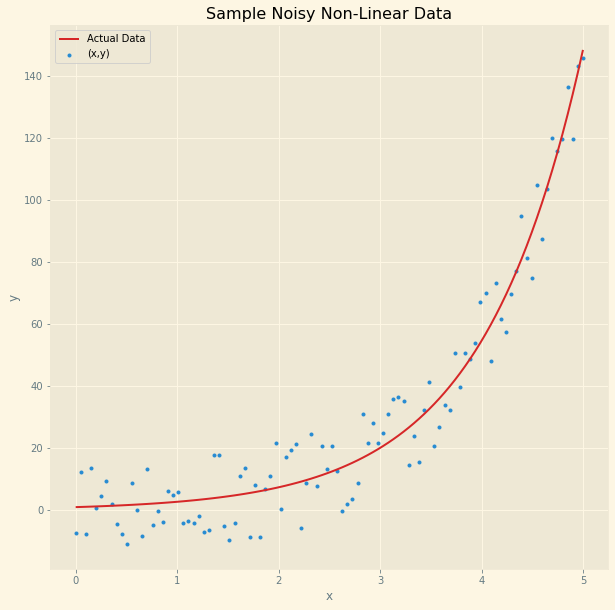

In [3]:
x = np.linspace(0,5,100)
y = np.exp(x) 
for i in np.arange(y.size):
    y[i] += 30*(np.random.random()-0.5)

plt.figure(figsize=fig_size)
plt.scatter(x,y,marker='.',label="(x,y)")
plt.plot(x,np.exp(x),label="Actual Data", color="tab:red")
plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

<h3>Assuming we know that the original data is $y$ which is an exponential. Normally we shouldn't know this, but for the purposes of this notebook, let's assume we do. Later it will help us actually calculate bias and variance.</h3>

<h3>Now let's divide the data into 2 sub-datasets. This will be for us to simulate as if the training process is adjusting. During the adjustment of the liner regression, as if we end up with different lines in each step.</h3>

In [4]:
x1 = []
x2 = []
y1 = []
y2 = []

for i in np.arange(x.size):
    if i%2==0:
        x1.append(x[i])
        y1.append(y[i])
    else:
        x2.append(x[i])
        y2.append(y[i])
x1 = np.array(x1)
x2 = np.array(x2)
y1 = np.array(y1)
y2 = np.array(y2)

Text(0, 0.5, 'y')

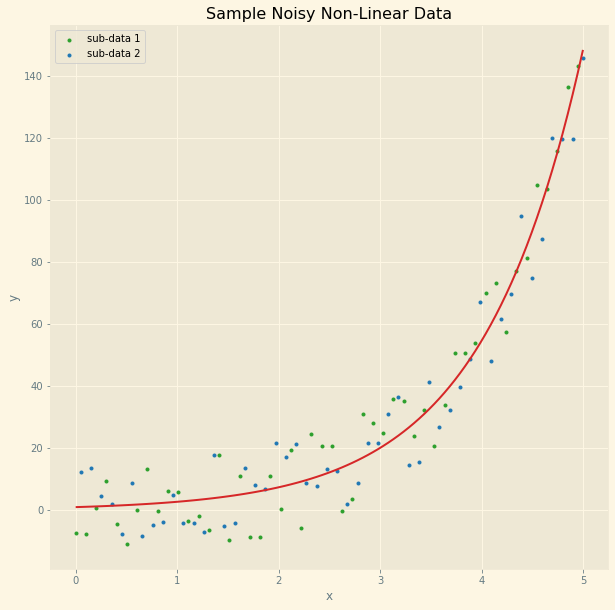

In [5]:
plt.figure(figsize=fig_size)
plt.scatter(x1,y1,marker=".",color='tab:green',label="sub-data 1")
plt.scatter(x2,y2,marker=".",color='tab:blue', label="sub-data 2")
plt.legend()
plt.plot(x,np.exp(x), color="tab:red",label="Actual Data")
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

In [6]:
print("Shape of x1: ",x1.shape)
print("Shape of y1: ",y1.shape)
print("Shape of x2: ",x2.shape)
print("Shape of y2: ",y2.shape)

x1 = x1[:,np.newaxis]
y1 = y1[:,np.newaxis]
x2 = x2[:,np.newaxis]
y2 = y2[:,np.newaxis]

print("Shape of x1: ",x1.shape)
print("Shape of y1: ",y1.shape)
print("Shape of x2: ",x2.shape)
print("Shape of y2: ",y2.shape)

Shape of x1:  (50,)
Shape of y1:  (50,)
Shape of x2:  (50,)
Shape of y2:  (50,)
Shape of x1:  (50, 1)
Shape of y1:  (50, 1)
Shape of x2:  (50, 1)
Shape of y2:  (50, 1)


<h2>Now we have the data. We try to fit simple linear regression.</h2>

In [7]:
regressor1 = LinearRegression()
regressor2 = LinearRegression()

regressor1.fit(x1, y1)
regressor2.fit(x2, y2)


print("Sub-data 1 intercept is: ",regressor1.intercept_," sub-data 1 coefficient: ", regressor1.coef_)
print("Sub-data 2 intercept is: ",regressor2.intercept_," sub-data 2 coefficient: ", regressor2.coef_)




Sub-data 1 intercept is:  [-27.15887452]  sub-data 1 coefficient:  [[22.88768982]]
Sub-data 2 intercept is:  [-24.50982906]  sub-data 2 coefficient:  [[21.55674153]]


<h3>Now we have the fit parameters and we also draw the average of the two regression results. Let's visualize.</h3>

In [8]:
def average(a,b):
    return 0.5*(a+b)

Text(0, 0.5, 'y')

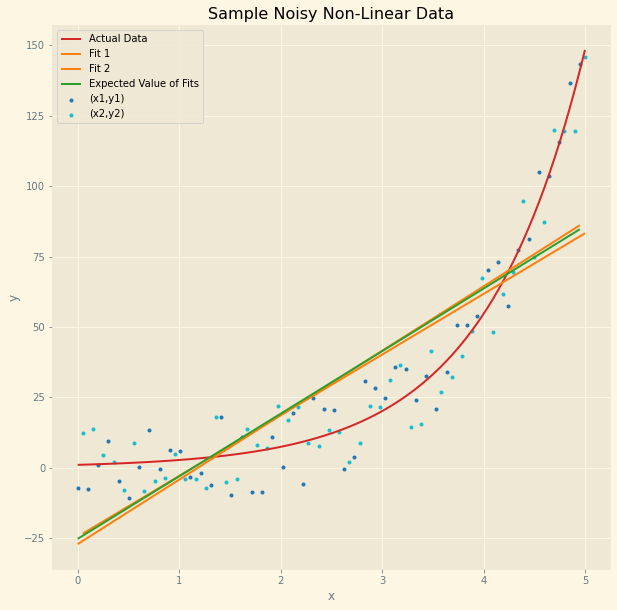

In [9]:
plt.figure(figsize=fig_size)
plt.scatter(x1,y1,marker='.',label="(x1,y1)",color="tab:blue")
plt.scatter(x2,y2,marker='.',label="(x2,y2)",color="tab:cyan")

pred1 = regressor1.predict(x1)
pred2 = regressor2.predict(x2)
expected_pred = average(pred1,pred2)

plt.plot(x,np.exp(x),label="Actual Data", color="tab:red")
plt.plot(x1,pred1,color='tab:orange',label="Fit 1")
plt.plot(x2,pred2,color='tab:orange',label="Fit 2")
plt.plot(x1,0.5*(pred1+pred2),color="tab:green",label="Expected Value of Fits")

plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

In [10]:
regressor_expected = LinearRegression()
regressor_expected.fit(average(x1,x2),expected_pred)
print("Average-data intercept is: ",regressor_expected.intercept_," Average-data coefficient: ", regressor_expected.coef_)



Average-data intercept is:  [-25.85115669]  Average-data coefficient:  [[22.22221567]]


<h3>Now the three lines are too close. Let's zoom in.</h3>

Text(0, 0.5, 'y')

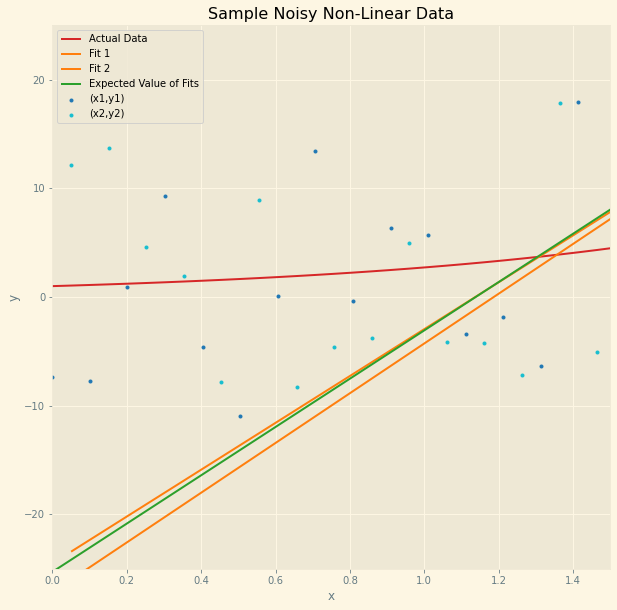

In [11]:
plt.figure(figsize=fig_size)
plt.scatter(x1,y1,marker='.',label="(x1,y1)",color="tab:blue")
plt.scatter(x2,y2,marker='.',label="(x2,y2)",color="tab:cyan")

plt.plot(x,np.exp(x),label="Actual Data", color="tab:red")
plt.plot(x1,pred1,color='tab:orange',label="Fit 1")
plt.plot(x2,pred2,color='tab:orange',label="Fit 2")
plt.plot(x1,expected_pred,color="tab:green",label="Expected Value of Fits")

plt.axis([0, 1.5, -25, 25])
plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

<h2>Now this is clearly underfitting as we planned to do so. Therefore we expect this to be a high bias low variance case. Let's actually calculate bias and variance of this model.</h2>
<p>Bias square is defined as the sum of the squares of the difference between the actual function $y$ the red line, and the expected value of possible predictions we have, the green line. Therefore bias is the square root of this sum value.</p>

In [12]:
def get_bias(y,expected):
    return np.sqrt(np.sum((y-expected)**2))

def get_variance(expected,y1,y2):
    return np.sum(average((y1-expected)**2,(y2-expected)**2))

In [13]:
bias = get_bias(y,expected_pred)
print("Bias is: ", bias)
variance = get_variance(expected_pred,pred1,pred2)
print("Variance is: ",variance)

Bias is:  3556.636980170247
Variance is:  49.512930436134134


<h3>Let's visualize what bias actually is now.</h3>

Text(0, 0.5, 'y')

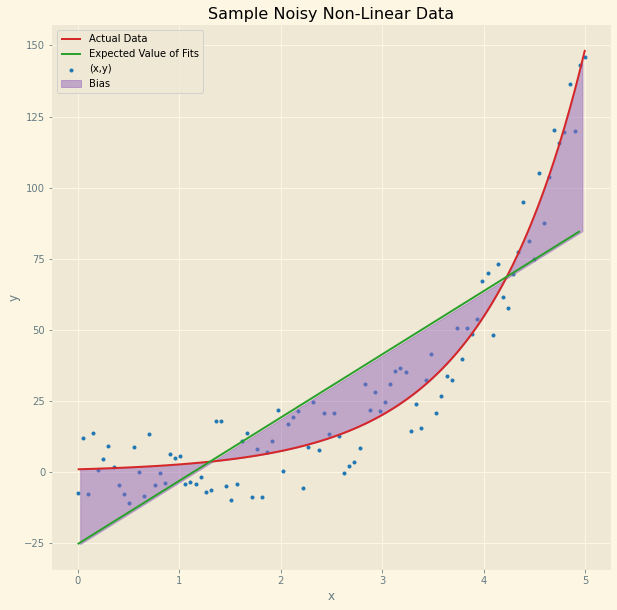

In [14]:
plt.figure(figsize=fig_size)
plt.scatter(x,y,marker='.',label="(x,y)",color="tab:blue")

plt.plot(x,np.exp(x),label="Actual Data", color="tab:red")
plt.plot(x1,expected_pred,color="tab:green",label="Expected Value of Fits")
plt.fill_between(average(x1,x2).flatten(),np.exp(average(x1,x2)).flatten(),expected_pred.flatten(),color='tab:purple', alpha=0.5,label="Bias")
plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

<h3>The bias value we have calculated above is supposedly the a measure of this area in the form of a scalar.</h3>

<h3>Now let's visualize what variance signifies.</h3>

Text(0, 0.5, 'y')

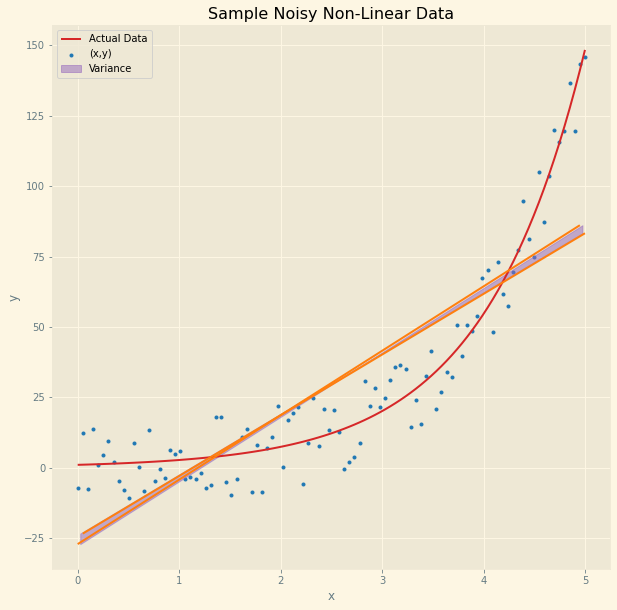

In [15]:
plt.figure(figsize=fig_size)
plt.scatter(x,y,marker='.',label="(x,y)",color="tab:blue")

plt.plot(x,np.exp(x),label="Actual Data", color="tab:red")
plt.plot(x1,pred1,color='tab:orange')
plt.plot(x2,pred2,color='tab:orange')

plt.fill_between(average(x1,x2).flatten(),pred1.flatten(),pred2.flatten(),color='tab:purple', alpha=0.5,label="Variance")

plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

<h3>Since this is a low variance model, it is not visible. Let's zoom in to see the variance region.</h3>

Text(0, 0.5, 'y')

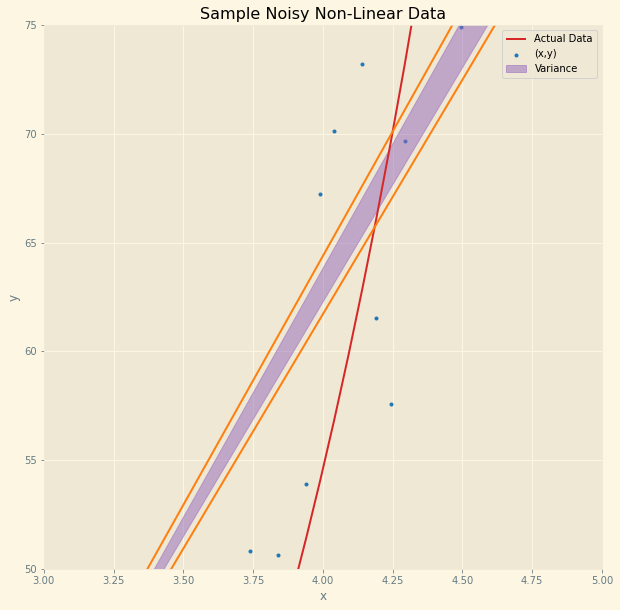

In [16]:
plt.figure(figsize=fig_size)
plt.scatter(x,y,marker='.',label="(x,y)",color="tab:blue")

plt.plot(x,np.exp(x),label="Actual Data", color="tab:red")
plt.plot(x1,pred1,color='tab:orange')
plt.plot(x2,pred2,color='tab:orange')

plt.fill_between(average(x1,x2).flatten(),pred1.flatten(),pred2.flatten(),color='tab:purple', alpha=0.5,label="Variance")

plt.axis([3, 5, 50, 75])
plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')



<h1>Low Bias, High Variance, Overfitting Case</h1>

Text(0, 0.5, 'y')

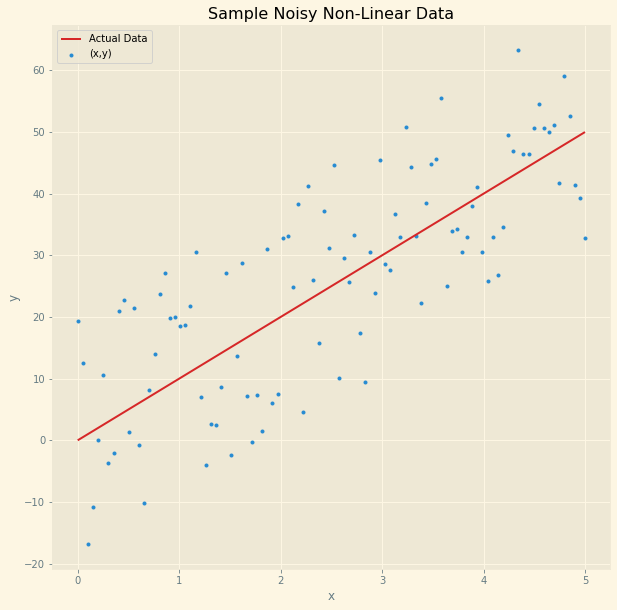

In [17]:
x = np.linspace(0,5,100)
y = 10*x 
for i in np.arange(y.size):
    y[i] += 40*(np.random.random()-0.5)

plt.figure(figsize=fig_size)
plt.scatter(x,y,marker='.',label="(x,y)")
plt.plot(x,10*x,label="Actual Data", color="tab:red")
plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

<h2>Now let's divide the data into two subsets as we have done in the previous case</h2>

In [18]:
x1 = []
x2 = []
y1 = []
y2 = []

for i in np.arange(x.size):
    if i%2==0:
        x1.append(x[i])
        y1.append(y[i])
    else:
        x2.append(x[i])
        y2.append(y[i])
x1 = np.array(x1)
x2 = np.array(x2)
y1 = np.array(y1)
y2 = np.array(y2)

Text(0, 0.5, 'y')

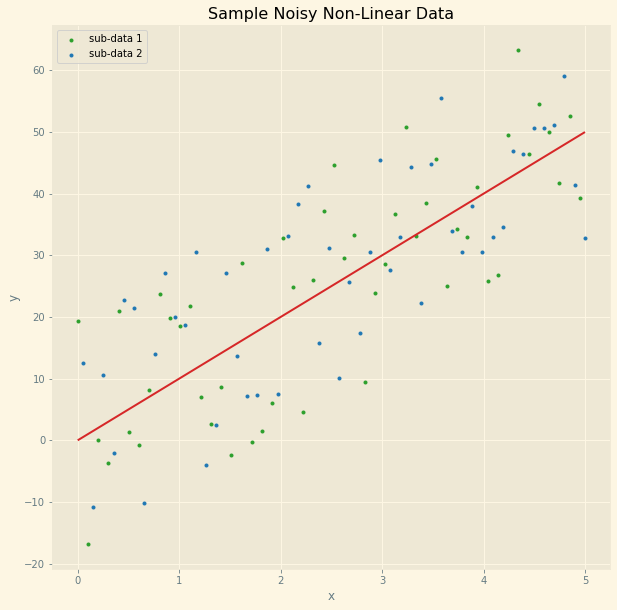

In [19]:
plt.figure(figsize=fig_size)
plt.scatter(x1,y1,marker=".",color='tab:green',label="sub-data 1")
plt.scatter(x2,y2,marker=".",color='tab:blue', label="sub-data 2")
plt.legend()
plt.plot(x,10*x,label="Actual Data", color="tab:red")
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

In [20]:
print("Shape of x1: ",x1.shape)
print("Shape of y1: ",y1.shape)
print("Shape of x2: ",x2.shape)
print("Shape of y2: ",y2.shape)

x1 = x1[:,np.newaxis]
y1 = y1[:,np.newaxis]
x2 = x2[:,np.newaxis]
y2 = y2[:,np.newaxis]

print("Shape of x1: ",x1.shape)
print("Shape of y1: ",y1.shape)
print("Shape of x2: ",x2.shape)
print("Shape of y2: ",y2.shape)

Shape of x1:  (50,)
Shape of y1:  (50,)
Shape of x2:  (50,)
Shape of y2:  (50,)
Shape of x1:  (50, 1)
Shape of y1:  (50, 1)
Shape of x2:  (50, 1)
Shape of y2:  (50, 1)


<h2>Let us try to fit this data to an overfitting polynomial model</h2>
<p>This time we can use np.polyfit() function instead of a regressor since numpy makes it really easy. Let's assume an exaggerated degree for the polynomial model since we are purposely trying to overfit.</p>

In [21]:
degree = 10

In [22]:
pol_coef1 = np.polyfit(x1.flatten(), y1.flatten(), degree)
pol_coef2 = np.polyfit(x2.flatten(), y2.flatten(), degree)

print("Sub-data 1 coefficients are: \n",pol_coef1)
print("Sub-data 2 intercept is: \n", pol_coef2)

Sub-data 1 coefficients are: 
 [ 7.97717262e-02 -2.10537979e+00  2.40199689e+01 -1.55341062e+02
  6.26392294e+02 -1.62612548e+03  2.69341117e+03 -2.70150778e+03
  1.45805242e+03 -3.18329455e+02  1.54922021e+01]
Sub-data 2 intercept is: 
 [ 1.08714319e-01 -3.01741499e+00  3.57050305e+01 -2.35464051e+02
  9.48867875e+02 -2.40745344e+03  3.81442981e+03 -3.60451374e+03
  1.83306601e+03 -3.93676658e+02  2.63566545e+01]


In [23]:
poly1 = np.poly1d(pol_coef1)
poly2 = np.poly1d(pol_coef2)
print("Below are the polynomials generated from the coefficients: \n")
print("Fitting for sub-data 1: \n",poly1,"\n")
print("Fitting for sub-data 2: \n",poly2)

Below are the polynomials generated from the coefficients: 

Fitting for sub-data 1: 
          10         9         8         7         6        5        4
0.07977 x  - 2.105 x + 24.02 x - 155.3 x + 626.4 x - 1626 x + 2693 x
         3        2
 - 2702 x + 1458 x - 318.3 x + 15.49 

Fitting for sub-data 2: 
         10         9         8         7         6        5        4
0.1087 x  - 3.017 x + 35.71 x - 235.5 x + 948.9 x - 2407 x + 3814 x
         3        2
 - 3605 x + 1833 x - 393.7 x + 26.36


<h2>Now let's visualize what we did and see the data along with the polynomials.</h2>

Text(0, 0.5, 'y')

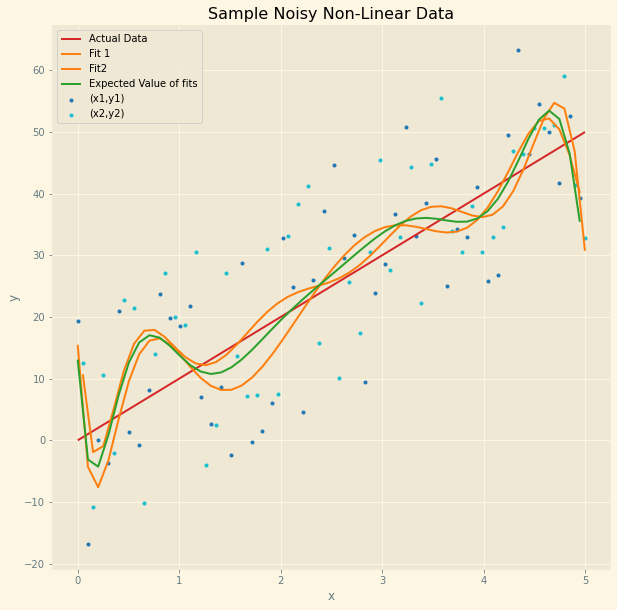

In [24]:
plt.figure(figsize=fig_size)
plt.scatter(x1,y1,marker='.',label="(x1,y1)",color="tab:blue")
plt.scatter(x2,y2,marker='.',label="(x2,y2)",color="tab:cyan")

expected_poly = average(poly1(x1),poly2(x2))

plt.plot(x,10*x,label="Actual Data", color="tab:red")
plt.plot(x1,poly1(x1),color='tab:orange',label="Fit 1")
plt.plot(x2,poly2(x2),color='tab:orange',label="Fit2")
plt.plot(x1,expected_poly,color="tab:green",label="Expected Value of fits")

plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

In [25]:
bias = get_bias(y,expected_poly)
print("Bias is: ", bias)
variance = get_variance(expected_poly,poly1(x1),poly2(x2))
print("Variance is: ",variance)

Bias is:  1606.3385792627118
Variance is:  247.8903005812591


<h2>Let's visualize the bias</h2>

Text(0, 0.5, 'y')

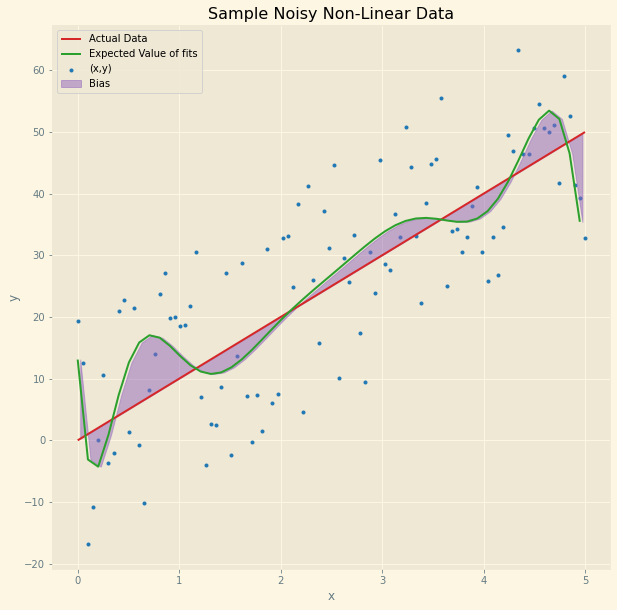

In [26]:
plt.figure(figsize=fig_size)
plt.scatter(x,y,marker='.',label="(x,y)",color="tab:blue")

plt.plot(x,10*x,label="Actual Data", color="tab:red")
plt.plot(x1,expected_poly,color="tab:green",label="Expected Value of fits")

plt.fill_between(average(x1,x2).flatten(),10*average(x1,x2).flatten(),expected_poly.flatten(),color='tab:purple', alpha=0.5,label="Bias")
plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

<h2>Now let's visualize variance</h2>

Text(0, 0.5, 'y')

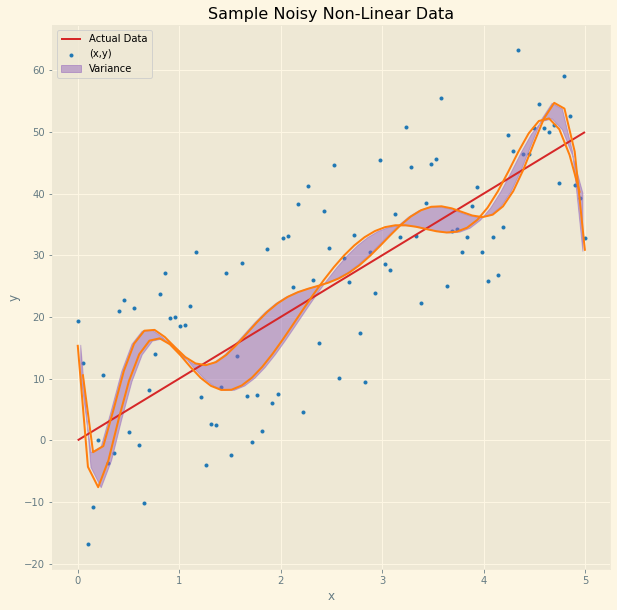

In [27]:
plt.figure(figsize=fig_size)
plt.scatter(x,y,marker='.',label="(x,y)",color="tab:blue")

plt.plot(x,10*x,label="Actual Data", color="tab:red")
plt.plot(x1,poly1(x1),color='tab:orange')
plt.plot(x2,poly2(x2),color='tab:orange')

plt.fill_between(average(x1,x2).flatten(),poly1(x1).flatten(),poly2(x2).flatten(),color='tab:purple', alpha=0.5,label="Variance")

plt.legend()
plt.title('Sample Noisy Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')

<h1>Conclusions</h1>

<h2>The objective was not to have a mathematical proof but to have a demonstration for gaining intuition on the subject and the terminology "bias-variance" that is used commonly in machine learning.</h2>
<p>We can see that The variance was barely visible in the underfitting case and it follows the bias was higher. Thus, we call it high bias-low variance. Now comparison of two different models on two different data will not be mathematically meaningful; but the idea behind this visual demonstration is to have more of an intuition aided with visuals.</p>